Assignment:
This is data a client collected by hosting an Autism screening questionnaire on their website over the course of several months. Some of the variables are the results of individual screening questions (e.g. A1_Score), and others are information about the "patient" (e.g. Country_of_res). Your task is to determine which factors are most influential in predicting whether someone has ASD (Autism Spectrum Disorder), and to assess how predictable ASD is overall given the features collected in this dataset. Please remember that the focus of this challenge is on how you approach the problem, do exploratory analysis, and choose which predictors are appropriate to use, not on how thoroughly you perform hyperparameter tuning or on the number of different models you test, for example. Please also remember that we are not looking for a powerpoint presentation, and that "walking through" your code is completely appropriate.

# Autism Spectrum Disorder Case Study
#### Examining any relationship between personal factors and ASD diagnosis

### 1. Clean and Examine The Data

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
# Read in the data
df = pd.read_csv('Autism-Adult-Data.csv')

In [3]:
# Make wide enough to see all columns and examine head of the data
pd.set_option('display.max_columns', df.shape[0]+1)

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,App_result,Age_desc,Relation,ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [4]:
# Examine number of columns/rows
df.shape

(704, 21)

In [5]:
# Examine measures of central tendency
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,App_result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [6]:
# Examine what patient information we have obtained from questionnaire
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jundice', 'Family', 'Country_of_res', 'Used_app_before',
       'App_result', 'Age_desc', 'Relation', 'ASD'],
      dtype='object')

In [7]:
# Examine dataframe for appropriate datatypes
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
Age                object
Gender             object
Ethnicity          object
Jundice            object
Family             object
Country_of_res     object
Used_app_before    object
App_result          int64
Age_desc           object
Relation           object
ASD                object
dtype: object

In [8]:
# Change dtype for our Age for better usage in ML. 

# When attempting to change age will find '?' inside of our Age column.
# df.Age.value_counts()

# Change to numerical and force '?'' to Nan
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Replace NaN with mean
df.loc[df['Age'].isna(),'Age']  = df['Age'].mean()

In [9]:
# With numerical data examine the spread of the numbers. 
# df.Age.describe()
# Note that the max is too large 383

# Replace max age with mean
# Re-examine spread of data
# Note to self: Fix hardcoding here

df.loc[df['Age'].eq(383),'Age']  = df['Age'].mean()
df.Age.describe()

count    704.000000
mean      29.196156
std        9.690838
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: Age, dtype: float64

In [10]:
df.Ethnicity.value_counts()

White-European       233
Asian                123
?                     95
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: Ethnicity, dtype: int64

For ease of usage I would like to edit some of the types of answers within some of the language based columns

In [11]:
# For our purposes there is no discerneable difference for us between '?', 'Others', and 'Other' 
# Reclassify as just one type

df.Ethnicity = df.Ethnicity.replace({'?':'Others','others':'Others'})

In [12]:
# Two ethnicities have extra quotation marks
for x in range(len(df)):
    df['Ethnicity'][x] = df['Ethnicity'][x].replace("'",'') 

<ipython-input-12-0b4328c7e513>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
#Check for any issues 
df.Ethnicity.unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

In [14]:
# Double check there aren't any misspelling issues or multiple classifications for one gender 
# i.e. 'f' vs 'F' vs 'Fem'
df.Gender.unique()

array(['f', 'm'], dtype=object)

In [15]:
# From header I can see United States is oddly formated. 
#Checking all of the different types.
df.Country_of_res.unique()

array(["'United States'", 'Brazil', 'Spain', 'Egypt', "'New Zealand'",
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       "'United Arab Emirates'", 'Afghanistan', 'Lebanon',
       "'United Kingdom'", "'South Africa'", 'Italy', 'Pakistan',
       'Bangladesh', 'Chile', 'France', 'China', 'Australia', 'Canada',
       "'Saudi Arabia'", 'Netherlands', 'Romania', 'Sweden', 'Tonga',
       'Oman', 'India', 'Philippines', "'Sri Lanka'", "'Sierra Leone'",
       'Ethiopia', "'Viet Nam'", 'Iran', "'Costa Rica'", 'Germany',
       'Mexico', 'Russia', 'Armenia', 'Iceland', 'Nicaragua',
       "'Hong Kong'", 'Japan', 'Ukraine', 'Kazakhstan', 'AmericanSamoa',
       'Uruguay', 'Serbia', 'Portugal', 'Malaysia', 'Ecuador', 'Niger',
       'Belgium', 'Bolivia', 'Aruba', 'Finland', 'Turkey', 'Nepal',
       'Indonesia', 'Angola', 'Azerbaijan', 'Iraq', "'Czech Republic'",
       'Cyprus'], dtype=object)

In [16]:
# Several countries have extra quotation marks
for x in range(len(df)):
    df['Country_of_res'][x] = df['Country_of_res'][x].replace("'",'') 

<ipython-input-16-f9fe67455609>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
# Check removal of quotations 
df.Country_of_res.unique()


array(['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand',
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom',
       'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile',
       'France', 'China', 'Australia', 'Canada', 'Saudi Arabia',
       'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India',
       'Philippines', 'Sri Lanka', 'Sierra Leone', 'Ethiopia', 'Viet Nam',
       'Iran', 'Costa Rica', 'Germany', 'Mexico', 'Russia', 'Armenia',
       'Iceland', 'Nicaragua', 'Hong Kong', 'Japan', 'Ukraine',
       'Kazakhstan', 'AmericanSamoa', 'Uruguay', 'Serbia', 'Portugal',
       'Malaysia', 'Ecuador', 'Niger', 'Belgium', 'Bolivia', 'Aruba',
       'Finland', 'Turkey', 'Nepal', 'Indonesia', 'Angola', 'Azerbaijan',
       'Iraq', 'Czech Republic', 'Cyprus'], dtype=object)

In [18]:
# Check for missing data files
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
Age                0
Gender             0
Ethnicity          0
Jundice            0
Family             0
Country_of_res     0
Used_app_before    0
App_result         0
Age_desc           0
Relation           0
ASD                0
dtype: int64

In [19]:
# App_result appears to be a summation of how many questions the patient got assigned a '1' on
df.App_result.unique()

array([ 6,  5,  8,  2,  9, 10,  4,  3,  0,  1,  7])

In [20]:
# On questionnaire they ask if the patient is born with jaundice
df = df.rename(columns={"Jundice": "Jaundice"})

In [21]:
# Change yes/no categorical varibles to binary 0/1
# Since it's simple with only 2 answer responses it is neater than get_dummies

df.ASD = df.ASD.map({'YES': 1, 'NO': 0})
df.Jaundice = df.Jaundice.map({'yes': 1, 'no': 0})
df.Family = df.Family.map({'yes': 1, 'no': 0})
df.Used_app_before = df.Used_app_before.map({'yes': 1, 'no': 0})

# Create new column for an encoded gender with 1 being male and 0 being female for ease of data exploration
df['GenderBinary'] = df.Gender.map({'m': 1, 'f': 0})

In [22]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jaundice,Family,Country_of_res,Used_app_before,App_result,Age_desc,Relation,ASD,GenderBinary
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,0,0,United States,0,6,'18 and more',Self,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,0,1,Brazil,0,5,'18 and more',Self,0,1
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,1,1,Spain,0,8,'18 and more',Parent,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,0,1,United States,0,6,'18 and more',Self,0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,0,0,Egypt,0,2,'18 and more',?,0,0


In [23]:
# Not useful due to the fact it only has one category
df.Age_desc.value_counts()

'18 and more'    704
Name: Age_desc, dtype: int64

In [24]:
df.Relation.value_counts()

Self                          522
?                              95
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: Relation, dtype: int64

The adjustment of missing values, spelling errors, and encoding of some categorical variables is complete.
Will use get_dummies on certain categories before ML

### 2. Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

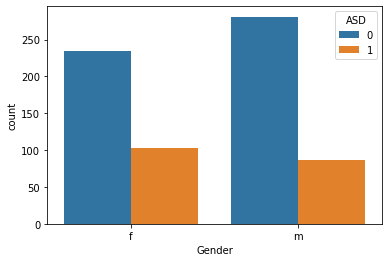

In [25]:
# Lets compare how the diagnosis rate varies between genders

sns.countplot(x='Gender', hue = 'ASD', data = df)

In [26]:
#Find the actual count of each Gender that filled survey
femaleTotal = df[df['Gender']=='f']['Gender'].count()
maleTotal = df[df['Gender']=='m']['Gender'].count()

#Find the actual count of each Gender that filled survey and positive for ASD
femalePos = df[(df['Gender']=='f') & (df['ASD'] == 1)]['Gender'].count()
malePos = df[(df['Gender']=='f') & (df['ASD'] == 1)]['Gender'].count()

#Find percentage
femalePer = femalePos/femaleTotal
malePer = malePos/maleTotal

In [27]:
#Coding a print out to give actual numbers for above countplot

print('There were ', femaleTotal, ' females represented in the survey. With ', '{0:.0%}'.format(femalePer), ' of women being diagnosed with Autism Spectrum Disorder.')
print('There were ', maleTotal, ' males represented in the survey. With ', '{0:.0%}'.format(malePer), ' of men being diagnosed with Autism Spectrum Disorder.')

There were  337  females represented in the survey. With  31%  of women being diagnosed with Autism Spectrum Disorder.
There were  367  males represented in the survey. With  28%  of men being diagnosed with Autism Spectrum Disorder.


It would appear that there is a slightly higher diagnosis for women with ASD than women. Can it be attributed to clinical biaseses, due to women having higher incidinces of austism, or should the 3% be considered negligible.

In [28]:
# Examine the ASD ratios based on Ethnicity if the category has over 100 completed questionnaires
df.groupby('Ethnicity')['Ethnicity'].count().sort_values(ascending = False)

Ethnicity
White-European     233
Others             126
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: Ethnicity, dtype: int64

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

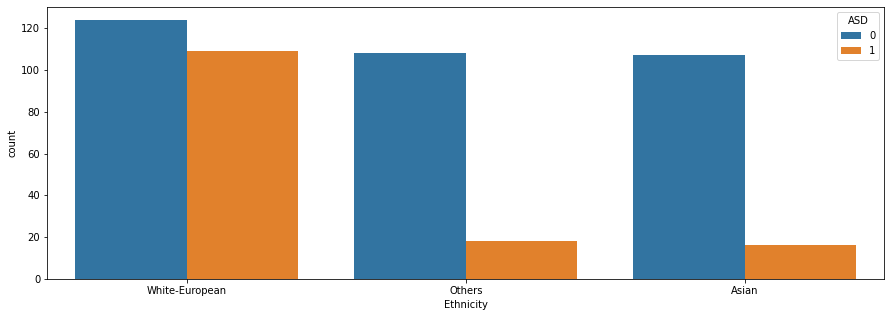

In [29]:
# Create list with more represented ethnicities

options = ['White-European', 'Others', 'Asian']
dfEthnic = df[df['Ethnicity'].isin(options)]

# Create countplot
plt.figure(figsize=(15,5))
sns.countplot(x='Ethnicity', hue = 'ASD', data = dfEthnic)

With this count plot we can see even when we narrow our frame to ethnicitys with larger data counts there is a much higher % of ASD diagnoseses for 'White-European' people. Is that due to access to healthcare, cultural differences, or ASD being based on true genetic differences. 

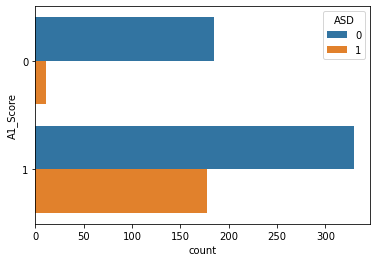

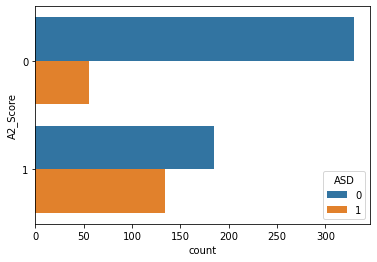

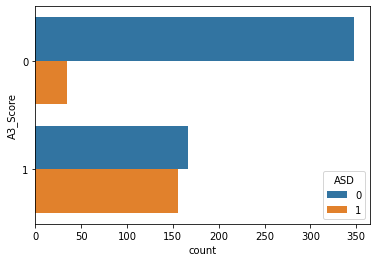

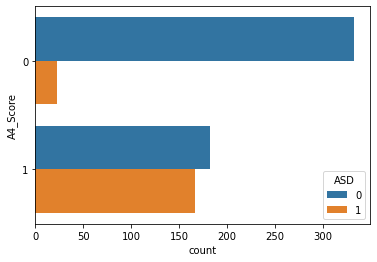

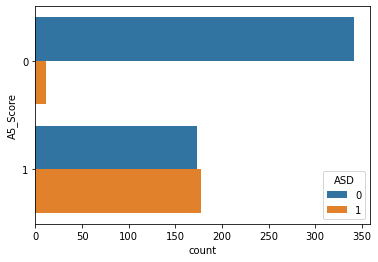

In [30]:
for col in ['A1_Score','A2_Score', 'A3_Score', 'A4_Score', 'A5_Score']:
    sns.countplot(y = col, hue = 'ASD', data = df )
    plt.show()

In [31]:
#Find the actual count of each Gender that filled survey
posTotal = df[df['Family']==1]['Family'].count()
negTotal = df[df['Family']==0]['Family'].count()

#Find the actual count of each Gender that filled survey and positive for ASD
posPos = df[(df['Family']==1) & (df['ASD'] == 1)]['Family'].count()
negPos = df[(df['Family']==0) & (df['ASD'] == 1)]['Family'].count()

#Find percentage
posPer = posPos/posTotal
negPer = negPos/negTotal

In [32]:
#Coding a print out to give actual numbers for above countplot

print('There were ', posTotal, ' persons who had family with PPD represented in the survey. With ', '{0:.0%}'.format(posPer), ' of them being diagnosed with Autism Spectrum Disorder.')
print('There were ', negTotal, ' persons who had family without PPD represented in the survey. With ', '{0:.0%}'.format(negPer), ' of them being diagnosed with Autism Spectrum Disorder.')

There were  91  persons who had family with PPD represented in the survey. With  47%  of them being diagnosed with Autism Spectrum Disorder.
There were  613  persons who had family without PPD represented in the survey. With  24%  of them being diagnosed with Autism Spectrum Disorder.


<AxesSubplot:xlabel='Family', ylabel='count'>

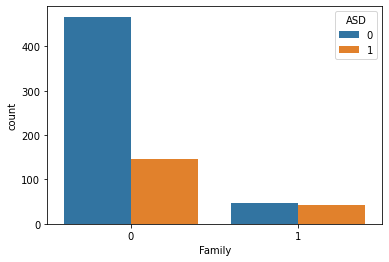

In [33]:
# Create countplot
sns.countplot(x='Family', hue = 'ASD', data = df)

<AxesSubplot:xlabel='ASD', ylabel='App_result'>

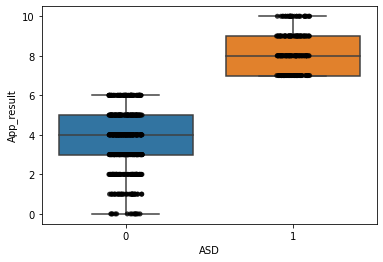

In [34]:
sns.boxplot(x = 'ASD', y = 'App_result', data = df) 
sns.stripplot(x = 'ASD', y = 'App_result', data = df,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

In general we can see if you score about 8 or higher on the questionairre you're likely to have ASD.
As for which questions are higher predictors than others we will look at our correlation coefficients.

<AxesSubplot:>

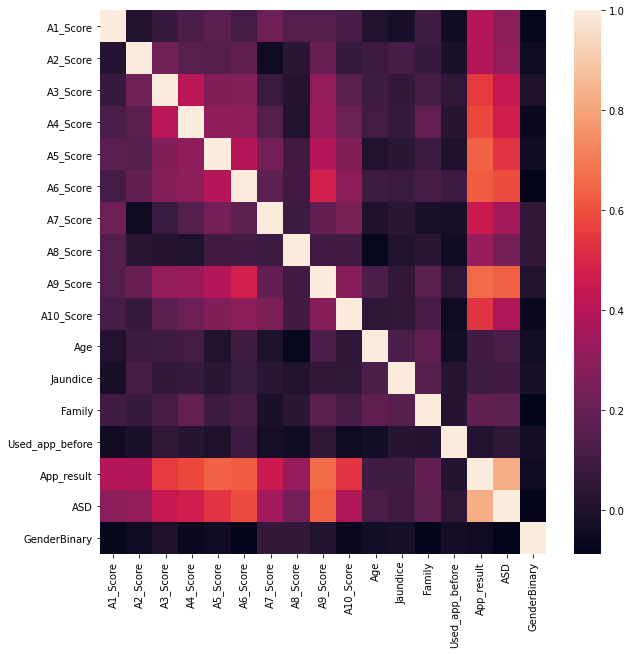

In [35]:
# Find correlation coefficients
corr = df.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr)

In [36]:
corr

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Jaundice,Family,Used_app_before,App_result,ASD,GenderBinary
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.006889,-0.019077,0.097630,-0.040620,0.397454,0.297628,-0.075011
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.082541,0.112615,0.074555,-0.009645,0.392540,0.311382,-0.047393
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.097704,0.061760,0.113697,0.055320,0.552356,0.441074,0.000795
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.106653,0.064918,0.193820,0.023071,0.586025,0.469945,-0.056508
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,0.009049,0.034378,0.090009,0.000374,0.639706,0.537004,-0.039688
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.091645,0.078366,0.114048,0.087378,0.630012,0.592091,-0.083615
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,-0.001181,0.030850,-0.008610,-0.022505,0.454848,0.351429,0.061900
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,-0.065972,0.012101,0.034845,-0.041155,0.324020,0.237161,0.064127
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.127663,0.057717,0.167644,0.049567,0.661205,0.635576,0.006940
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,0.046406,0.052201,0.117969,-0.041860,0.537205,0.385917,-0.055246


Looking at the 'ASD' diagnosis on our heatmap we can see questions 5, 6, and 9 on our questionnaire have higher correlations to an 'ASD' diagnosis (0.537, 0.592, 0.636) than other factors. The app result has a very high correlation to an ASD diagnosis. Based on this we can assume our app has fairly high accuracy in predicting whether a patient has ASD or not.

### Machine Learning

### Random Forest

In [37]:
# import machine learning packages

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [38]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'Family', 'Country_of_res', 'Used_app_before',
       'App_result', 'Age_desc', 'Relation', 'ASD', 'GenderBinary'],
      dtype='object')

In [39]:
df.Ethnicity.nunique()

10

In [40]:
df.Relation.nunique()

6

In [41]:
df.Country_of_res.nunique()

67

In [42]:
# Preprocessing. One hot encode (getdummies)the variables 'Ethnicity' and 'Relation'
# There are too many countries with too small of a representation to be a good sample

# After running ML with 'Ethnicity and Relation' they also had a negligible affect on the predictive
# effect of the data. So we will not use them.

#df = pd.get_dummies(df,columns=['Ethnicity', 'Relation'],drop_first=True)

In [43]:
# Drop Age_desc since it has only one category and doesn't add value to our machine learning
df = df.drop('Age_desc', axis = 1)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jaundice,Family,Country_of_res,Used_app_before,App_result,Relation,ASD,GenderBinary
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,0,0,United States,0,6,Self,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,0,1,Brazil,0,5,Self,0,1
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,1,1,Spain,0,8,Parent,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,0,1,United States,0,6,Self,0,0
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,0,0,Egypt,0,2,?,0,0


In [44]:
# Create a list of features
# Drop unneeded categorical columns 
features_list = list(df.drop(['Gender','ASD', 'Country_of_res','Ethnicity', 'Relation'], axis = 1).columns)

In [45]:
# Assign X & y values
X = df[features_list]
y = df['ASD']

In [46]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
#RANDOM FOREST OPTION ONE
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  1.0


In [48]:
#OPTION TWO BELOW 

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn import preprocessing
import numpy as np

In [49]:
# RANDOM FOREST OPTION 2

from sklearn.metrics import accuracy_score,log_loss


#Build random forest model
rf = RandomForestClassifier(random_state=42)

#Train the model
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_prob = model.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]

ac = accuracy_score(y_test, y_pred)


#Find accuracy
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


In [50]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: App_result           Importance: 0.51
Variable: A9_Score             Importance: 0.13
Variable: A6_Score             Importance: 0.11
Variable: A3_Score             Importance: 0.05
Variable: A5_Score             Importance: 0.05
Variable: A4_Score             Importance: 0.03
Variable: A1_Score             Importance: 0.02
Variable: A2_Score             Importance: 0.02
Variable: A7_Score             Importance: 0.02
Variable: A10_Score            Importance: 0.02
Variable: A8_Score             Importance: 0.01
Variable: Age                  Importance: 0.01
Variable: Jaundice             Importance: 0.0
Variable: Family               Importance: 0.0
Variable: Used_app_before      Importance: 0.0
Variable: GenderBinary         Importance: 0.0


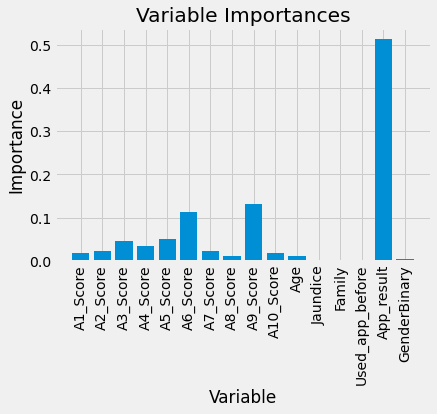

In [51]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks

import matplotlib.pyplot as plt

%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Conclusion
We can see